<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Ciencia_de_datos_Medidas_centrales_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajando con medida centrales
###1. Cómo analizar dataframes
###2. Overview de los datos
###3. Obtener las medidas entrales
###4. Analizar gráficas

In [ ]:
!pip install statsmodels

In [ ]:
!pip install wquantiles

##1. Analizando dataframes

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
estado=pd.read_csv("/content/Viral_Social_Media_Trends.csv")

In [26]:
#Ver los primeros 5 registros
estado.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [6]:
#Ver los últimos 4 registros
estado.tail(4)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [7]:
#Ver un muestreo de 10 registros(aleatorios)
estado.sample(10)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
569,Post_570,TikTok,#Challenge,Reel,India,137563,40490,5847,43200,Medium
1545,Post_1546,YouTube,#Tech,Reel,UK,3101726,490,80829,593,High
838,Post_839,TikTok,#Viral,Tweet,UK,4562262,96215,869,7479,High
1923,Post_1924,TikTok,#Dance,Shorts,Brazil,2785587,329454,68787,12448,High
4752,Post_4753,TikTok,#Viral,Shorts,Canada,3905473,416515,20273,39780,Medium
4624,Post_4625,Instagram,#Tech,Video,UK,1766643,372453,31196,35447,Low
3165,Post_3166,TikTok,#Education,Video,UK,1616973,258225,21629,6932,Medium
1635,Post_1636,YouTube,#Gaming,Video,Japan,261709,433301,20171,13866,High
4250,Post_4251,YouTube,#Challenge,Post,Japan,746909,45821,7638,15981,Low
1689,Post_1690,Instagram,#Music,Reel,USA,3237142,326165,92290,9091,High


Las gráficas representan distintas métricas de interacción en publicaciones de redes sociales como TikTok, Instagram, Twitter y YouTube. Se incluyen variables clave como el número de vistas, "Likes", compartidos y comentarios, así como el tipo de contenido y la región en la que fue publicado.

Uno de los aspectos más destacados es la gran variabilidad en el nivel de interacción, lo que sugiere que algunos contenidos logran captar una audiencia masiva mientras que otros tienen un impacto más limitado. Esto puede depender de factores como la plataforma utilizada, el tipo de contenido, y el hashtag asociado a la publicación.

In [8]:
estado.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

In [9]:
list(estado.columns) #Convertit en lista los nombres de las columnas

['Post_ID',
 'Platform',
 'Hashtag',
 'Content_Type',
 'Region',
 'Views',
 'Likes',
 'Shares',
 'Comments',
 'Engagement_Level']

In [10]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [11]:
estado.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [13]:
estado["Views"].mean()

2494066.444

In [14]:
trim_mean(estado.Views, 0.1)

2493855.26825

In [15]:
np.average(estado['Likes'],weights=estado.Views)

251206.7383304692

La tabla muestra un resumen estadístico de las métricas de interacción en redes sociales, como vistas, Likes, compartidos y comentarios. Con 5,000 registros. En promedio, una publicación tiene 2.49 millones de vistas y 251,475 Likes, aunque la gran dispersión de los datos indica que hay contenidos extremadamente virales y otros con escaso impacto. La publicación más exitosa logró casi 5 millones de vistas y 500,000 Likes, mientras que otras apenas superaron unas pocas centenas.

La distribución de los datos muestra que solo el 25% de las publicaciones más populares superan los 3.75 millones de vistas y los 373,970 Likes. Aunque algunas publicaciones generan una gran interacción, la mayoría se mantiene en un rango más moderado.


<Axes: >

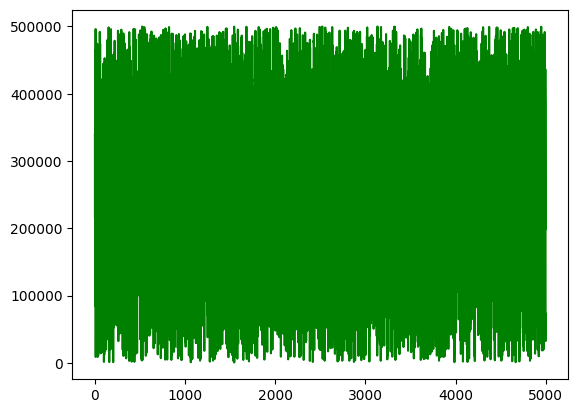

In [27]:
estado["Likes"].plot.line(color="green")

<Axes: >

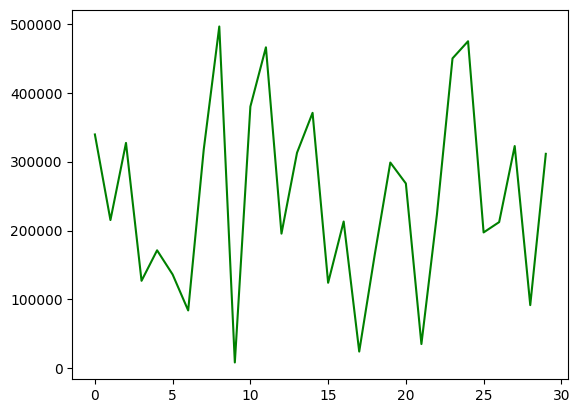

In [22]:
estado["Likes"].head(30).plot.line(color="green")

Las gráficas muestran la variabilidad en la cantidad de "Likes" recibidos en publicaciones de redes sociales. La primera, que incluye los 5,000 registros, refleja una distribución densa y dispersa, lo que sugiere que algunas publicaciones alcanzan un alto nivel de interacción mientras que otras reciben pocos "Likes". Sin embargo, la gran cantidad de datos dificulta la identificación de patrones claros. En contraste, la segunda gráfica, que solo muestra las primeras 30 publicaciones, permite visualizar mejor las fluctuaciones individuales y facilita la interpretación de la dinámica de interacción en menor escala.

In [18]:
print(estado.index)

RangeIndex(start=0, stop=5000, step=1)


<Axes: >

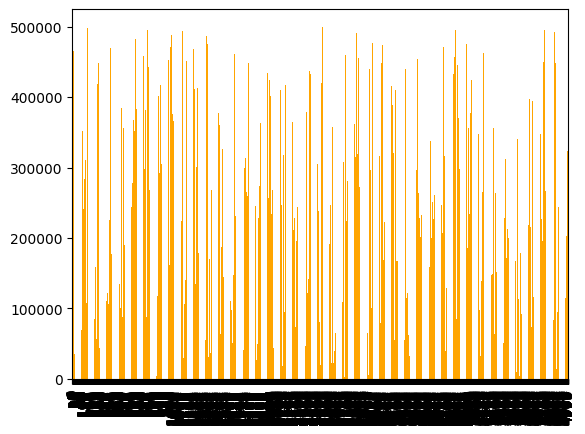

In [28]:
estado["Likes"].plot.bar(color="orange")

<Axes: >

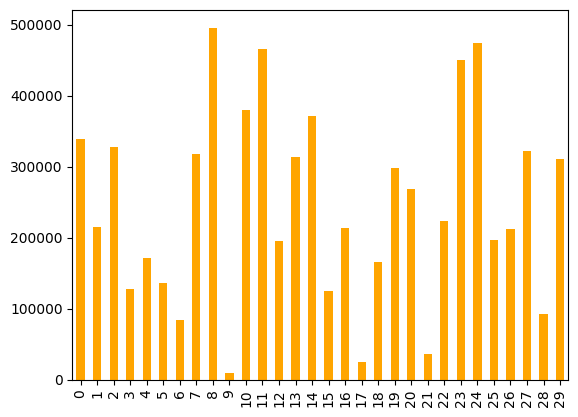

In [23]:
estado["Likes"].head(30).plot.bar(color="orange")

Las gráficas representan la distribución de "Likes" en publicaciones de redes sociales utilizando diagramas de barras. La primera gráfica, que muestra solo los primeros 30 registros, permite visualizar con claridad las diferencias en la cantidad de interacciones entre publicaciones individuales. Se observa que algunas publicaciones reciben significativamente más "Likes" que otras, con variaciones marcadas en el nivel de engagement.

En contraste, la segunda gráfica, que abarca la totalidad de los datos, se vuelve difícil de interpretar debido a la gran cantidad de barras, lo que provoca una sobrecarga visual y dificulta la identificación de patrones específicos. Aunque refleja la variabilidad de los datos en su conjunto, la saturación de información hace que sea menos efectiva para el análisis detallado de cada publicación.

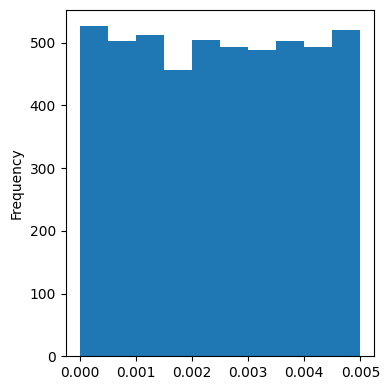

In [25]:
ax=(estado.Views/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Views")
plt.tight_layout()
plt.show()

La gráfica muestra un histograma de la cantidad de vistas en publicaciones de redes sociales, normalizado en millones para facilitar la interpretación. Se observa una distribución relativamente uniforme, lo que indica que los valores de vistas están bastante dispersos en el dataset y no hay una concentración clara en un rango específico.

Este tipo de distribución sugiere que las publicaciones pueden recibir desde un número relativamente bajo hasta varios millones de vistas sin que haya una fuerte predominancia de valores intermedios. Aunque esto refleja la variabilidad en el alcance de las publicaciones, un análisis más detallado podría ayudar a identificar factores que influyen en la viralidad y en la distribución de la atención en diferentes plataformas.